In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource
from ctapipe.calib import CameraCalibrator
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.hillas import hillas_parameters
from copy import deepcopy
import os

In [2]:
import ctapipe
ctapipe.__version__

'0.12.0'

In [3]:
# source = EventSource(input_url=get_dataset_path('gamma_test_large.simtel.gz'))
# # source = event_source('/Usaers/thomasvuillaume/Work/CTA/Data/DL0/Simtel/LST_mono/gamma_20deg_180deg_run100___cta-prod3-demo-2147m-LaPalma-baseline-mono_off0.4.simtel',
# #                      max_events=1000)

In [4]:
from ctapipe.tools.process import ProcessorTool

In [5]:
processor = ProcessorTool()
processor.input_url = get_dataset_path('gamma_test_large.simtel.gz')

In [6]:
from subprocess import run

In [87]:
run(['ctapipe-process', '-i', get_dataset_path('gamma_test_large.simtel.gz'), 
     '-o', 'dl1_camera_frame_gamma_test_large.h5',
     '--progress',
     '--write-images',
     '--overwrite',
     '--camera-frame',
    ])

SimTelEventSource: 0ev [00:00, ?ev/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
SimTelEventSource: 110ev [00:16,  6.86ev/s]


CompletedProcess(args=['ctapipe-process', '-i', PosixPath('/Users/thomasvuillaume/.cache/ctapipe/cccta-dataserver.in2p3.fr/data/ctapipe-extra/v0.3.3/gamma_test_large.simtel.gz'), '-o', 'dl1_camera_frame_gamma_test_large.h5', '--progress', '--write-images', '--overwrite', '--camera-frame'], returncode=0)

In [88]:
ls -lsh dl1_gamma_test_large.h5

16512 -rw-r--r--  1 thomasvuillaume  staff   7,8M 21 jul 15:29 dl1_gamma_test_large.h5


In [89]:
from ctapipe.io.tableloader import read_table

In [90]:
from ctapipe.instrument import SubarrayDescription

In [91]:
subarray = SubarrayDescription.from_hdf('dl1_gamma_test_large.h5')
geom = subarray.tels[1].camera.geometry

In [109]:
from ctapipe.io import TableLoader

dl1_filename = "dl1_camera_frame_gamma_test_large.h5"
loader = TableLoader(dl1_filename, 
                     load_dl1_images=True, 
                     load_true_images=True,
                     load_true_parameters=True,
                     load_simulated=True,
                     load_instrument=True,
                     load_trigger=True
                    )
# events = loader.read_subarray_events()
# tel_events = loader.read_telescope_events()

# print(loader.subarray, len(events), len(tel_events))

In [112]:
tel_type = 'LST_LST_LSTCam'
tel_id = 1
geom = loader.subarray.tels[tel_id].camera.geometry
dl1_events = loader.read_telescope_events_by_type([tel_type])[tel_type]
dl1_events = dl1_events[np.isfinite(dl1_events['camera_frame_hillas_intensity'])]

In [113]:
dl1_events.colnames

['obs_id',
 'event_id',
 'tel_id',
 'camera_frame_hillas_intensity',
 'camera_frame_hillas_skewness',
 'camera_frame_hillas_kurtosis',
 'camera_frame_hillas_x',
 'camera_frame_hillas_y',
 'camera_frame_hillas_r',
 'camera_frame_hillas_phi',
 'camera_frame_hillas_length',
 'camera_frame_hillas_length_uncertainty',
 'camera_frame_hillas_width',
 'camera_frame_hillas_width_uncertainty',
 'camera_frame_hillas_psi',
 'camera_frame_timing_intercept',
 'camera_frame_timing_deviation',
 'camera_frame_timing_slope',
 'leakage_pixels_width_1',
 'leakage_pixels_width_2',
 'leakage_intensity_width_1',
 'leakage_intensity_width_2',
 'concentration_cog',
 'concentration_core',
 'concentration_pixel',
 'morphology_num_pixels',
 'morphology_num_islands',
 'morphology_num_small_islands',
 'morphology_num_medium_islands',
 'morphology_num_large_islands',
 'intensity_max',
 'intensity_min',
 'intensity_mean',
 'intensity_std',
 'intensity_skewness',
 'intensity_kurtosis',
 'peak_time_max',
 'peak_time_mi

In [114]:
pointing_tel = read_table(dl1_filename, path=f'/dl1/monitoring/telescope/pointing/tel_00{tel_id:d}')
pointing_tel

time,azimuth,altitude
,rad,rad
object,float32,float32
57576.8681935056,0.0,1.2217305


In [115]:
pointing_tel['altitude'][0]

1.2217305

In [116]:
from ctapipe.io import HDF5TableReader

In [117]:
from ctapipe.io import dl1eventsource
from ctapipe.image.hillas import HillasParametersContainer
from ctapipe.containers import CameraHillasParametersContainer

In [118]:
source = dl1eventsource.DL1EventSource(input_url=dl1_filename)

In [119]:
HillasParametersContainer().keys()

dict_keys(['intensity', 'skewness', 'kurtosis', 'fov_lon', 'fov_lat', 'r', 'phi', 'length', 'length_uncertainty', 'width', 'width_uncertainty', 'psi'])

In [120]:
event

obs_id,event_id,tel_id,hillas_intensity,hillas_skewness,hillas_kurtosis,hillas_fov_lon,hillas_fov_lat,hillas_r,hillas_phi,hillas_length,hillas_length_uncertainty,hillas_width,hillas_width_uncertainty,hillas_psi,timing_intercept,timing_deviation,timing_slope,leakage_pixels_width_1,leakage_pixels_width_2,leakage_intensity_width_1,leakage_intensity_width_2,concentration_cog,concentration_core,concentration_pixel,morphology_num_pixels,morphology_num_islands,morphology_num_small_islands,morphology_num_medium_islands,morphology_num_large_islands,intensity_max,intensity_min,intensity_mean,intensity_std,intensity_skewness,intensity_kurtosis,peak_time_max,peak_time_min,peak_time_mean,peak_time_std,peak_time_skewness,peak_time_kurtosis,core_psi,image [1855],peak_time [1855],image_mask [1855],pos_x,pos_y,pos_z,name,type,camera_type,tel_description,mirror_area,num_mirrors,num_mirror_tiles,equivalent_focal_length,time,tels_with_trigger [98],event_type,true_energy,true_alt,true_az,true_core_x,true_core_y,true_h_first_int,true_x_max,true_shower_primary_id
,,,,,,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,1 / deg,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,m,m,m,,,,,m2,,,m,,,,TeV,deg,deg,m,m,m,g / cm2,
int32,int64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64,float32,float32,bool,float64,float64,float64,str5,str3,str8,str18,float64,int64,int64,float64,object,bool,int64,float64,float64,float64,float64,float64,float64,float64,int64
7514,31012,3,23797.321395874023,-1.45230570508739,5.377521687643544,1.5032408698558288,-1.1794428799902674,1.9107115480795747,-38.11773297700198,0.39761064737598084,0.002696361547640645,0.15550522915863246,0.0011350863194149986,-14.256018336074904,33.661955955873864,0.5488951590607959,-0.9318643581901658,0.007547169811320755,0.016711590296495958,0.11476013,0.27465174,0.08740481559583761,0.5371192333290772,0.06262598481923919,236,2,0,1,1,1490.3307,5.0110655,100.836105,215.22592,3.706130027770996,15.407302856445312,36.219185,32.78211,34.221394,0.70784163,0.5969035625457764,-0.5826239585876465,nan,1.1093452 .. 3.4980175,34.26634 .. 42.10054,False .. False,80.0,0.0,16.0,LST,LST,LSTCam,LST_LST_LSTCam,386.7332458496094,1,198,28.0,57576.87633633193,False .. False,32,1.8637498617172241,68.47897801473843,6.384090732299001,51.67511749267578,69.65403747558594,18171.7265625,379.5384521484375,0


In [205]:
def read_container_from_row(container, row):
    return container(**{key: event[f'{container.container_prefix}_{key}'] 
                        for key in container().keys()})


def read_camera_hillas_from_row(container: CameraHillasParametersContainer, event):
    camera_hillas_params = read_container_from_row(container, event)
    for param in ['x', 'y', 'r', 'length', 'length_uncertainty', 'width', 'width_uncertainty']:
        camera_hillas_params[param] *= u.m
        
    for param in ['psi', 'phi']:
        camera_hillas_params[param] *= u.deg
    return camera_hillas_params

In [211]:
hillas_params = read_camera_hillas_from_row(CameraHillasParametersContainer, event)
hillas_params

ctapipe.containers.CameraHillasParametersContainer:
                     intensity: total intensity (size)
                      skewness: measure of the asymmetry
                      kurtosis: measure of the tailedness
                             x: centroid x coordinate [m]
                             y: centroid x coordinate [m]
                             r: radial coordinate of centroid [m]
                           phi: polar coordinate of centroid [deg]
                        length: standard deviation along the major-axis [m]
            length_uncertainty: uncertainty of length [m]
                         width: standard spread along the minor-axis [m]
             width_uncertainty: uncertainty of width [m]
                           psi: rotation angle of ellipse [deg]

In [164]:
# tab.root.dl1.event.telescope.parameters.tel_001

In [212]:
# reader = HDF5TableReader(dl1_filename)
# gen = reader.read('/dl1/event/telescope/parameters/tel_001', 
#                   [CameraHillasParametersContainer],
#                   # prefixes=[True],
#                  )

In [218]:
plt.style.use('seaborn-paper')

In [250]:
def display_event(event):
    display = CameraDisplay(geometry=geom, image=event['image'],
                            show_frame=False,
                            cmap='binary')
    hillas_params = read_camera_hillas_from_row(CameraHillasParametersContainer, event)
    display.highlight_pixels(event['image'].astype(bool), alpha=0.2, color='grey')
    # display.highlight_pixels(event['image_mask'], alpha=0.2, color='darkred')
    display.overlay_moments(hillas_params, with_label=False, color='orange', lw=2)
    display.add_colorbar()
    display.colorbar.ax.set_ylabel('Pixel charge / photo-electron', rotation=270, labelpad=20)
    return display
    

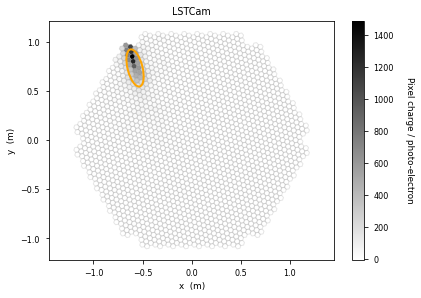

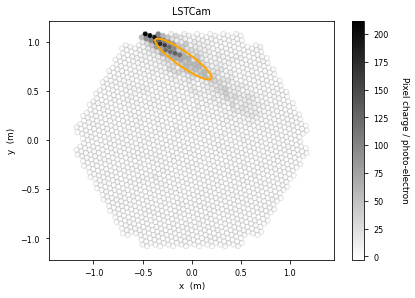

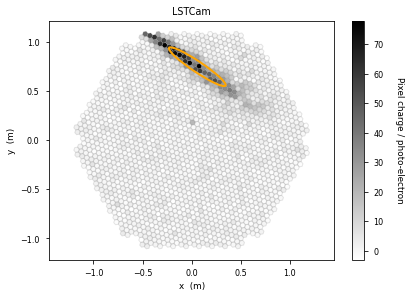

In [253]:
dl1_events.sort('morphology_num_pixels', reverse=True)
for event in dl1_events[:3]:
    display = display_event(event)
    plt.show()

In [279]:
geom_ = deepcopy(geom)

In [255]:
# define some plotting options

visible_axis = False
color = 'black' # or 'dark'
transparent = True
camera_border_color = 'black' # or None
show_frame = False

In [256]:
plt.style.use(['seaborn-paper', 'seaborn-colorblind'])

In [257]:
from lstchain.reco.utils import sky_to_camera

In [289]:
from ctapipe.coordinates import EngineeringCameraFrame
geom_engineering_frame = geom.transform_to(EngineeringCameraFrame())
geom = geom_

In [290]:
event = dl1_events[3]
event

obs_id,event_id,tel_id,camera_frame_hillas_intensity,camera_frame_hillas_skewness,camera_frame_hillas_kurtosis,camera_frame_hillas_x,camera_frame_hillas_y,camera_frame_hillas_r,camera_frame_hillas_phi,camera_frame_hillas_length,camera_frame_hillas_length_uncertainty,camera_frame_hillas_width,camera_frame_hillas_width_uncertainty,camera_frame_hillas_psi,camera_frame_timing_intercept,camera_frame_timing_deviation,camera_frame_timing_slope,leakage_pixels_width_1,leakage_pixels_width_2,leakage_intensity_width_1,leakage_intensity_width_2,concentration_cog,concentration_core,concentration_pixel,morphology_num_pixels,morphology_num_islands,morphology_num_small_islands,morphology_num_medium_islands,morphology_num_large_islands,intensity_max,intensity_min,intensity_mean,intensity_std,intensity_skewness,intensity_kurtosis,peak_time_max,peak_time_min,peak_time_mean,peak_time_std,peak_time_skewness,peak_time_kurtosis,core_psi,image [1855],peak_time [1855],image_mask [1855],pos_x,pos_y,pos_z,name,type,camera_type,tel_description,mirror_area,num_mirrors,num_mirror_tiles,equivalent_focal_length,time,tels_with_trigger [98],event_type,true_energy,true_alt,true_az,true_core_x,true_core_y,true_h_first_int,true_x_max,true_shower_primary_id
,,,,,,m,m,m,deg,m,m,m,m,deg,,,1 / m,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,m,m,m,,,,,m2,,,m,,,,TeV,deg,deg,m,m,m,g / cm2,
int32,int64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64,float32,float32,bool,float64,float64,float64,str5,str3,str8,str18,float64,int64,int64,float64,object,bool,int64,float64,float64,float64,float64,float64,float64,float64,int64
7514,869911,2,1686.15829372406,-0.7410526283687344,2.899142509487658,0.7783576541079881,0.2735360739576646,0.8250228005726045,19.362863866541776,0.12270008913126049,0.0020589437810708145,0.03530098834254912,0.0006042198451863548,-54.58367485012244,32.75270805271096,0.3309607643097647,-0.02978637154473418,0.0,0.0,0.0,0.0,0.2811090308037461,0.34921989770898254,0.09680661541290211,45,1,0,1,0,163.23128,5.655618,37.470184,40.433144,1.646369218826294,1.7070741653442383,33.92901,32.396404,32.860058,0.31494164,1.1447267532348633,1.418205738067627,nan,1.3328987 .. 2.0444477,24.502277 .. 33.30943,False .. False,-20.0,-65.0,16.0,LST,LST,LSTCam,LST_LST_LSTCam,386.7332458496094,1,198,28.0,57576.88148495013,True .. False,32,0.24814441800117493,71.94054520685758,359.7607894724221,52.6271858215332,-175.83209228515625,28720.640625,242.0,0


In [297]:
source_in_cam = sky_to_camera(event['true_alt']*u.deg,
                              event['true_az']*u.deg, 
                              loader.subarray.tels[tel_id].optics.equivalent_focal_length,
                              70*u.deg,
                              0*u.deg
                             )#.transform_to(EngineeringCameraFrame())

In [298]:
cleaned_image = deepcopy(event['image'])
signal_pixels = event['image_mask']
cleaned_image[~signal_pixels] = 0

In [299]:
event

obs_id,event_id,tel_id,camera_frame_hillas_intensity,camera_frame_hillas_skewness,camera_frame_hillas_kurtosis,camera_frame_hillas_x,camera_frame_hillas_y,camera_frame_hillas_r,camera_frame_hillas_phi,camera_frame_hillas_length,camera_frame_hillas_length_uncertainty,camera_frame_hillas_width,camera_frame_hillas_width_uncertainty,camera_frame_hillas_psi,camera_frame_timing_intercept,camera_frame_timing_deviation,camera_frame_timing_slope,leakage_pixels_width_1,leakage_pixels_width_2,leakage_intensity_width_1,leakage_intensity_width_2,concentration_cog,concentration_core,concentration_pixel,morphology_num_pixels,morphology_num_islands,morphology_num_small_islands,morphology_num_medium_islands,morphology_num_large_islands,intensity_max,intensity_min,intensity_mean,intensity_std,intensity_skewness,intensity_kurtosis,peak_time_max,peak_time_min,peak_time_mean,peak_time_std,peak_time_skewness,peak_time_kurtosis,core_psi,image [1855],peak_time [1855],image_mask [1855],pos_x,pos_y,pos_z,name,type,camera_type,tel_description,mirror_area,num_mirrors,num_mirror_tiles,equivalent_focal_length,time,tels_with_trigger [98],event_type,true_energy,true_alt,true_az,true_core_x,true_core_y,true_h_first_int,true_x_max,true_shower_primary_id
,,,,,,m,m,m,deg,m,m,m,m,deg,,,1 / m,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,m,m,m,,,,,m2,,,m,,,,TeV,deg,deg,m,m,m,g / cm2,
int32,int64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64,float32,float32,bool,float64,float64,float64,str5,str3,str8,str18,float64,int64,int64,float64,object,bool,int64,float64,float64,float64,float64,float64,float64,float64,int64
7514,869911,2,1686.15829372406,-0.7410526283687344,2.899142509487658,0.7783576541079881,0.2735360739576646,0.8250228005726045,19.362863866541776,0.12270008913126049,0.0020589437810708145,0.03530098834254912,0.0006042198451863548,-54.58367485012244,32.75270805271096,0.3309607643097647,-0.02978637154473418,0.0,0.0,0.0,0.0,0.2811090308037461,0.34921989770898254,0.09680661541290211,45,1,0,1,0,163.23128,5.655618,37.470184,40.433144,1.646369218826294,1.7070741653442383,33.92901,32.396404,32.860058,0.31494164,1.1447267532348633,1.418205738067627,nan,1.3328987 .. 2.0444477,24.502277 .. 33.30943,False .. False,-20.0,-65.0,16.0,LST,LST,LSTCam,LST_LST_LSTCam,386.7332458496094,1,198,28.0,57576.88148495013,True .. False,32,0.24814441800117493,71.94054520685758,359.7607894724221,52.6271858215332,-175.83209228515625,28720.640625,242.0,0


In [300]:
cleaned_image

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [301]:
source_in_cam.x

<Quantity 0.94840042 m>

In [323]:
hillas_parameters

<function ctapipe.image.hillas.hillas_parameters(geom, image)>

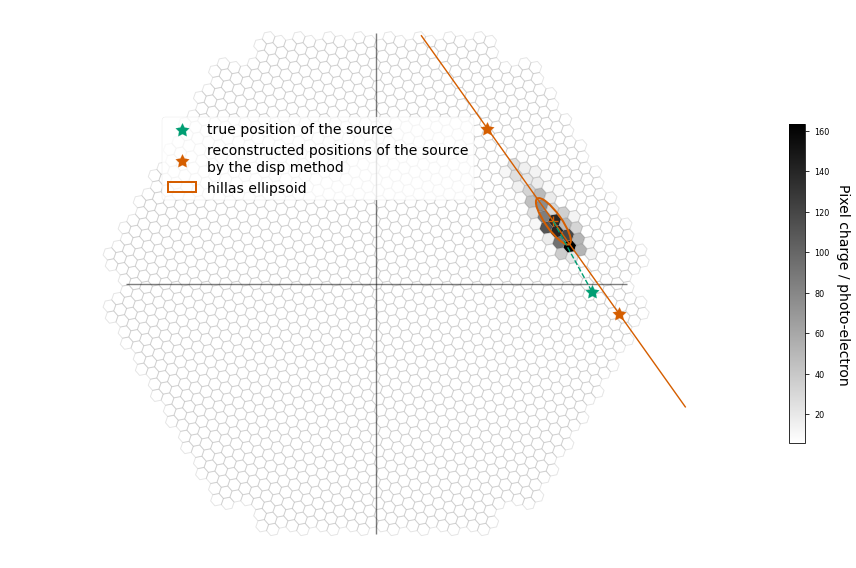

In [322]:
fig = plt.figure(figsize=(12,8))

transparent_pixels = True
show_frame = False
camera_border_color = None
visible_axis = False
visible_colorbar = True

display_image = deepcopy(cleaned_image)
if transparent_pixels:
    display_image[~signal_pixels] = np.nan


display = CameraDisplay(geom, display_image,
                        cmap='binary',
                        show_frame=show_frame)

if transparent_pixels:
    display.highlight_pixels(np.ones(geom.n_pixels, dtype=bool), color='black', alpha=0.1)


if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

# display.highlight_pixels(event['image_mask'], alpha=0.5, color='darkblue')
    
axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)

if visible_colorbar:
    display.add_colorbar(fraction=0.02, pad=0.01)
    display.colorbar.ax.set_ylabel('Pixel charge / photo-electron',
                                   rotation=270, labelpad=20,
                                   fontsize=14
                                  )


axis_color = 'black'
display.axes.hlines(0, -1.1, 1.1, color=axis_color, alpha=0.5)
display.axes.vlines(0, -1.1, 1.1, color=axis_color, alpha=0.5)

### Hillas direction
scale = 1
display.axes.plot([event['camera_frame_hillas_x'] - scale*np.cos(np.deg2rad(event['camera_frame_hillas_psi'])), event['camera_frame_hillas_x'] + scale*np.cos(np.deg2rad(event['camera_frame_hillas_psi']))],
                  [event['camera_frame_hillas_y'] - scale*np.sin(np.deg2rad(event['camera_frame_hillas_psi'])), event['camera_frame_hillas_y'] + scale*np.sin(np.deg2rad(event['camera_frame_hillas_psi']))],
                  color='C2'
                 )
display.axes.scatter(event['camera_frame_hillas_x'],
                     event['camera_frame_hillas_y'],
                     s=100,
                     marker='+',
                     color='C2')

### Source 
source_marker = dict(marker=(5, 1), s=200)
display.axes.scatter(source_in_cam.x, source_in_cam.y, 
                     **source_marker,
                     color='C1',
                     label='true position of the source'
                    )

display.axes.plot([event['camera_frame_hillas_x'], source_in_cam.x.to_value(u.m)],
                  [event['camera_frame_hillas_y'], source_in_cam.y.to_value(u.m)],
                  color='C1',
                  ls='--',
                 )

disp = 0.5
display.axes.scatter(event['camera_frame_hillas_x'] - disp*np.cos(np.deg2rad(event['camera_frame_hillas_psi'])),
                     event['camera_frame_hillas_y'] - disp*np.sin(np.deg2rad(event['camera_frame_hillas_psi'])),
                     **source_marker,
                     color='C2',
                     label='reconstructed positions of the source\nby the disp method'
                    )
display.axes.scatter(event['camera_frame_hillas_x'] + disp*np.cos(np.deg2rad(event['camera_frame_hillas_psi'])),
                     event['camera_frame_hillas_y'] + disp*np.sin(np.deg2rad(event['camera_frame_hillas_psi'])),
                     **source_marker,
                     color='C2')

# display.axes.plot([0,  event['camera_frame_hillas_x']], [0, event['camera_frame_hillas_y']], color='gray', ls='--')

hillas = hillas_parameters(geom, cleaned_image)
# hillas.width *= 2
# hillas.length *= 2
display.overlay_moments(hillas, color='C2', lw=2, with_label=False, label='hillas ellipsoid')
# display.axes.text(hillas.x.value/2, hillas.y.value/2, '(x,y)', fontsize=20)
# display.axes.plot([-1,  1], [0, 1], color='black', ls='--')

display.axes.legend(loc=(0.2, 0.65), fontsize=14)

fig.tight_layout()
fig.savefig(f'source_disp_tel_{tel_id}.png', dpi=300, transparent=True)